In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

def gauss(x,amp,mu,sigma):
  return amp*np.exp(-(x-mu)**2/(2*sigma**2))

def background(x,a,b,c):
  return (a+b*x+c*x*x)

def fit(x,a,b,c,amp1,mu1,sigma1,amp2,mu2,sigma2):
  return background(x,a,b,c) + gauss(x,amp1,mu1,sigma1) + gauss(x,amp2,mu2,sigma2) 


#for large Al scatterer, number of electrons. use cm 
def number_electrons(d,h,rho,A,Z):
  N_0 = 6.02*10.0**23.0
  number = np.pi*((d/2.0)**2.0)*h*rho*(N_0/A)*Z
  return number


#FINDING N_e number of electrons in scatterer (for Y(theta) equation)
test_ne = number_electrons(1.91, 4.0, 2.7, 27.0, 13.0)
print(test_ne)

n_e = number_electrons(6.4, 17.4, 2.7, 27, 13)
print(n_e)

x_values = np.linspace(0,2047,2048)

cs_counts = np.loadtxt('cs.Spe',skiprows=12,max_rows=2048)
co_counts = np.loadtxt('co.Spe',skiprows=12,max_rows=2048)
ba_counts = np.loadtxt('ba.Spe',skiprows=12,max_rows=2048)
na_counts = np.loadtxt('Na.Spe',skiprows=12,max_rows=2048)
no_scatter = np.loadtxt('NGamma_without_scatterer.Spe',skiprows=12,max_rows=2048)

channels = np.zeros(4) #[cs, co, ba, na]
channels_sd = np.zeros(4)

8.969256639272379e+24
4.380653685367713e+26


[-2.23320928e+03  2.27432837e+00 -5.84363392e-04  2.06013651e+03
  1.02668225e+03  4.47799948e+01  2.27926711e+03  4.69422520e+01
  6.16879950e+02] [[ 7.27159739e+05 -6.68787715e+02  1.55779102e-01  1.97657526e+03
  -2.85198827e+00  6.79303546e+01 -6.93828074e+05  9.54472560e+04
  -6.41721580e+04]
 [-6.68787715e+02  6.15890132e-01 -1.43683410e-04 -1.78673365e+00
   2.09336015e-03 -6.13425502e-02  6.38039723e+02 -8.77685497e+01
   5.88610570e+01]
 [ 1.55779102e-01 -1.43683410e-04  3.35861658e-08  4.08502219e-04
  -3.37926250e-07  1.40114041e-05 -1.48591958e-01  2.04413807e-02
  -1.36672192e-02]
 [ 1.97657526e+03 -1.78673365e+00  4.08502219e-04  1.08891405e+02
  -2.58784359e-02 -8.73159616e-01 -1.89154756e+03  2.66223973e+02
  -1.88483123e+02]
 [-2.85198827e+00  2.09336015e-03 -3.37926250e-07 -2.58784359e-02
   6.07106778e-02 -9.63530886e-04  2.74072938e+00 -3.21823224e-01
   3.22847478e-01]
 [ 6.79303546e+01 -6.13425502e-02  1.40114041e-05 -8.73159616e-01
  -9.63530886e-04  7.95041146e-

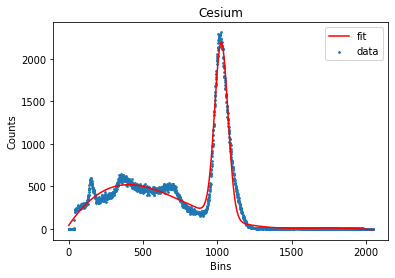

In [2]:
guesses = [1.0,1.0,1.0,2000.0,1000.0,50.0,500.0, 400.0, 50.0]
parameters, pcov = curve_fit(fit, x_values, cs_counts, p0=guesses)

channels[0] = parameters[4]
channels_sd[0] = pcov[4][4]**0.5
print(parameters, pcov)

plt.plot(x_values, fit(x_values, *parameters), color='red', label='fit')
plt.scatter(x_values, cs_counts, s=3, label='data')
plt.title('Cesium')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('cs.jpg')



[-5.24334081e+01  9.97414702e-02 -3.67345137e-05  1.02206064e+02
  2.57795936e+02  3.03606428e+02  2.91165477e+02  8.14001601e+02
  3.25852482e+01  3.56488228e+01  1.77392038e+03  5.05640574e+01]


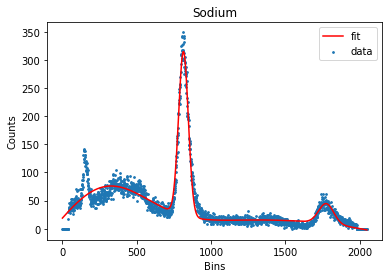

In [3]:
def fit_na(x,a,b,c,amp1,mu1,sigma1,amp2,mu2,sigma2,amp3,mu3,sigma3):
  return background(x,a,b,c) + gauss(x,amp1,mu1,sigma1) + gauss(x,amp2,mu2,sigma2) + gauss(x,amp3,mu3,sigma3)

guesses_na = [1.0, 1.0, 1.0, 100.0, 300.0, 50.0, 350.0, 800.0, 50.0, 60.0, 1750.0, 50.0]
parameters_na, pcov_na = curve_fit(fit_na, x_values, na_counts, p0=guesses_na)

print(parameters_na)

channels[3] = parameters_na[7]
channels_sd[3] = pcov_na[7][7]**0.5

plt.plot(x_values, fit_na(x_values, *parameters_na), color='red', label='fit')
plt.scatter(x_values, na_counts, s=3, label='data')
plt.title('Sodium')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('na_fit1.jpg')

691.0708858219671


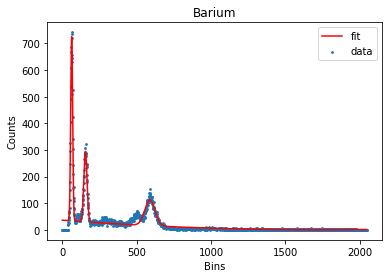

In [4]:
def fit_ba(x,a,b,c,amp1,mu1,sigma1,amp2,mu2,sigma2,amp3,mu3,sigma3):
  return background(x,a,b,c) + gauss(x,amp1,mu1,sigma1) + gauss(x,amp2,mu2,sigma2) + gauss(x,amp3,mu3,sigma3)

guesses_ba = [1.0, 1.0, 1.0, 700.0, 60.0, 5.0, 300.0, 160.0, 10.0, 150.0, 600.0, 50.0]
parameters_ba, pcov_ba = curve_fit(fit_ba, x_values, ba_counts, p0=guesses_ba)

channels[2] = parameters_ba[4]
print(parameters_ba[3])
channels_sd[2] = pcov_ba[4][4]**0.5

plt.plot(x_values, fit_ba(x_values, *parameters_ba), color='red', label='fit')
plt.scatter(x_values, ba_counts, s=3, label='data')
plt.title('Barium')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('ba_fit.jpg')


1.395372125143824
[1026.68225012 1636.00898148   63.11092959  814.00160136]


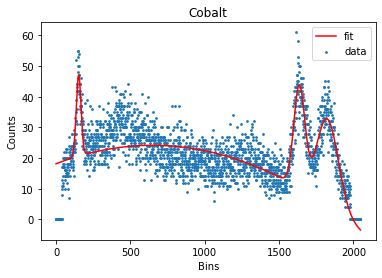

In [5]:
def fit_co(x,a,b,c,amp1,mu1,sigma1,amp2,mu2,sigma2,amp3,mu3,sigma3):
  return background(x,a,b,c) + gauss(x,amp1,mu1,sigma1) + gauss(x,amp2,mu2,sigma2) + gauss(x,amp3,mu3,sigma3)

guesses_co = [1.0, 1.0, 1.0, 60.0, 150.0, 10.0, 60.0, 1650.0, 10.0, 50.0, 1850.0, 10.0]
parameters_co, pcov_co = curve_fit(fit_co, x_values, co_counts, p0=guesses_co)

channels[1] = parameters_co[7]
channels_sd[1] = pcov_co[7][7]**0.5

print(channels_sd[1])

plt.plot(x_values, fit_co(x_values, *parameters_co), color='red', label='fit')
plt.scatter(x_values, co_counts, s=3, label='data')
plt.title('Cobalt')
plt.xlabel('Bins')
plt.ylabel('Counts')
plt.legend()
#plt.savefig('co_fit.jpg')

print(channels) #[cs, co, ba, na]


In [6]:
actual_channels = np.array([662.0, 1173.2, 31.0, 511.0]) #keV
print(channels)

[1026.68225012 1636.00898148   63.11092959  814.00160136]


[ 1.37544903 67.5215841 ]
[[ 6.41776024e-03 -3.81407493e+00]
 [-3.81407493e+00  3.33197943e+03]]
[1026.68225012 1636.00898148   63.11092959  814.00160136]
[ 662.  1173.2   31.   511. ]


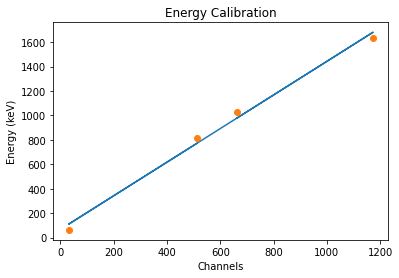

In [7]:
def line_fit(x,a,b):
  return a*x + b

guesses_line = [1.0, 0.0]
parameters_line, pcov_line = curve_fit(line_fit, actual_channels, channels, p0=guesses_line)

y_error = np.array([pcov_line[0][0]**0.5, pcov_line[1][1]**0.5])

print(parameters_line)
print(pcov_line)

print(channels) #[cs, co, ba, na]
print(actual_channels)

plt.plot(actual_channels, line_fit(actual_channels, *parameters_line))
plt.errorbar(actual_channels, channels, yerr=channels_sd, fmt='o')
plt.title('Energy Calibration')
plt.xlabel('Channels')
plt.ylabel('Energy (keV)')
plt.savefig('calibration1.jpg')

#every 1 channel represents 1.38 keV, according to best fit line. 


[112.25231708  44.43559524 -42.97572855  19.54151689  17.78628132
  14.08775058  16.88341129  14.58125159  14.00531049  19.51310377]


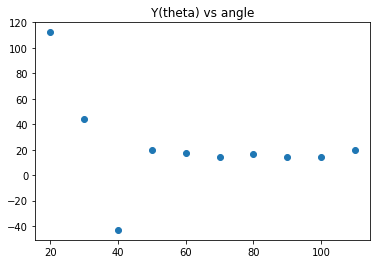

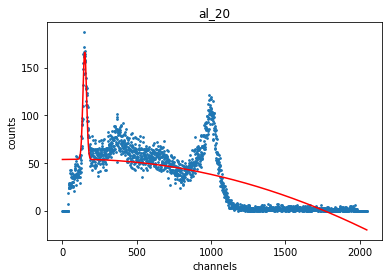

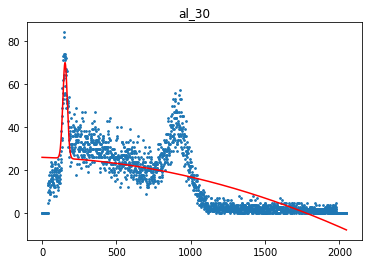

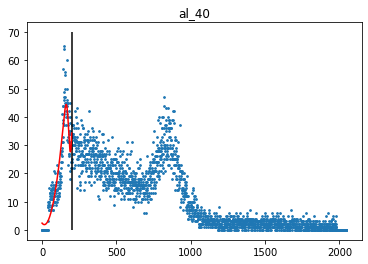

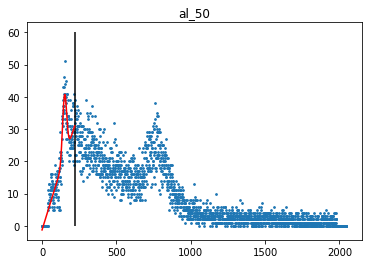

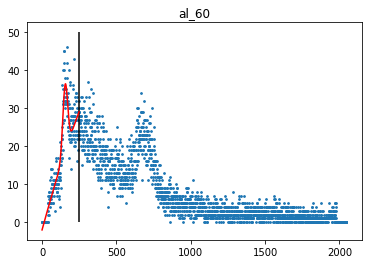

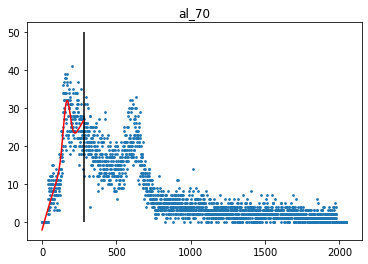

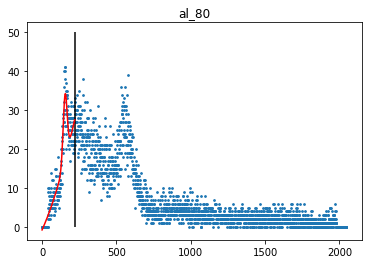

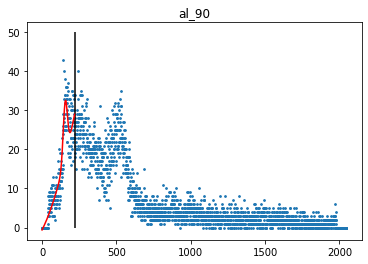

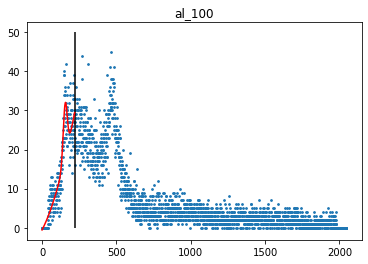

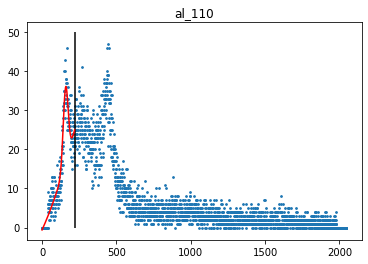

In [8]:
def fit_al(x,a,b,c,amp,mu,sigma):
  return background(x, a, b, c) + gauss(x,amp,mu,sigma)

al_20 = np.loadtxt('Al_20.Spe',skiprows=12,max_rows=2048)
al_30 = np.loadtxt('Al_30.Spe',skiprows=12,max_rows=2048)
al_40 = np.loadtxt('Al_40.Spe',skiprows=12,max_rows=2048)
al_50 = np.loadtxt('Al_50.Spe',skiprows=12,max_rows=2048)
al_60 = np.loadtxt('Al_60.Spe',skiprows=12,max_rows=2048)
al_70 = np.loadtxt('Al_70.Spe',skiprows=12,max_rows=2048)
al_80 = np.loadtxt('Al_80.Spe',skiprows=12,max_rows=2048)
al_90 = np.loadtxt('Al_90.Spe',skiprows=12,max_rows=2048)
al_100 = np.loadtxt('Al_100.Spe',skiprows=12,max_rows=2048)
al_110 = np.loadtxt('Al_110.Spe',skiprows=12,max_rows=2048)

y_theta = np.zeros(10)

guess_al20 = [1.0, 1.0, 1.0, 180.0, 150.0, 10.0]
guess_al30 = [1.0, 1.0, 1.0, 90.0, 200.0, 10.0]
guess_al40 = [1.0, 1.0, 1.0, 200.0, 200.0, 2.0]
guess_al50 = [1.0, 1.0, 1.0, 50.0, 150.0, 2.0]
guess_al60 = [1.0, 1.0, 1.0, 50.0, 150.0, 10.0]
guess_al70 = [1.0, 1.0, 1.0, 40.0, 200.0, 10.0]
guess_al80 = [1.0, 1.0, 1.0, 40.0, 150.0, 10.0]
guess_al90 = [1.0, 1.0, 1.0, 40.0, 150.0, 10.0]
guess_al100 = [1.0, 1.0, 1.0, 40.0, 150.0, 10.0]
guess_al110 = [1.0, 1.0, 1.0, 90.0, 150.0, 10.0]

param_al20, pcov_al20 = curve_fit(fit_al, x_values, al_20, p0=guess_al20)
param_al30, pcov_al30 = curve_fit(fit_al, x_values, al_30, p0=guess_al30)
param_al40, pcov_al40 = curve_fit(fit_al, x_values[0:200], al_40[0:200], p0=guess_al40)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al50, pcov_al50 = curve_fit(fit_al, x_values[0:220], al_50[0:220], p0=guess_al50)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al60, pcov_al60 = curve_fit(fit_al, x_values[0:250], al_60[0:250], p0=guess_al60)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al70, pcov_al70 = curve_fit(fit_al, x_values[0:280], al_70[0:280], p0=guess_al70)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al80, pcov_al80 = curve_fit(fit_al, x_values[0:220], al_80[0:220], p0=guess_al80)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al90, pcov_al90 = curve_fit(fit_al, x_values[0:220], al_90[0:220], p0=guess_al90)
                                  # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                  #         [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al100, pcov_al100 = curve_fit(fit_al, x_values[0:220], al_100[0:220], p0=guess_al100)
                                    # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                    #       [np.inf, np.inf, np.inf, np.inf, np.inf, np.inf]))
param_al110, pcov_al110 = curve_fit(fit_al, x_values[0:220], al_110[0:220], p0=guess_al110)
                                    # bounds=([-np.inf,-np.inf,-np.inf,0,0,0], 
                                    #       [np.inf, np.inf, np.inf, np.inf, 250.0, np.inf]))

y_theta[0] = param_al20[3]
y_theta[1] = param_al30[3]
y_theta[2] = param_al40[3]
y_theta[3] = param_al50[3]
y_theta[4] = param_al60[3]
y_theta[5] = param_al70[3]
y_theta[6] = param_al80[3]
y_theta[7] = param_al90[3]
y_theta[8] = param_al100[3]
y_theta[9] = param_al110[3]

error_y_theta = np.zeros(10)

error_y_theta[0] = pcov_al20[5][5]**0.5
error_y_theta[1] = pcov_al30[5][5]**0.5
error_y_theta[2] = pcov_al40[5][5]**0.5
error_y_theta[3] = pcov_al50[5][5]**0.5
error_y_theta[4] = pcov_al60[5][5]**0.5
error_y_theta[5] = pcov_al70[5][5]**0.5
error_y_theta[6] = pcov_al80[5][5]**0.5
error_y_theta[7] = pcov_al90[5][5]**0.5
error_y_theta[8] = pcov_al100[5][5]**0.5
error_y_theta[9] = pcov_al110[5][5]**0.5



print(y_theta)

angle = np.array([20.0, 30.0, 40.0, 50.0, 60.0, 70.0, 80.0, 90.0, 100.0, 110.0])

plt.scatter(angle, y_theta)
plt.title('Y(theta) vs angle')
plt.show()

plt.plot(x_values, fit_al(x_values, *param_al20), color='red', label='fit')
plt.scatter(x_values, al_20, s=3, label='data')
plt.xlabel('channels')
plt.ylabel('counts')
plt.title('al_20')
plt.show()

plt.plot(x_values, fit_al(x_values, *param_al30), color='red', label='fit')
plt.scatter(x_values, al_30, s=3, label='data')
plt.title('al_30')
plt.show()

plt.plot(x_values[0:200], fit_al(x_values[0:200], *param_al40), color='red', label='fit')
plt.scatter(x_values, al_40, s=3, label='data')
plt.title('al_40')
plt.vlines(x_values[200],0,70)
plt.show()

#plt.figure()
plt.plot(x_values[0:220], fit_al(x_values[0:220], *param_al50), color='red', label='fit')
plt.scatter(x_values, al_50, s=3, label='data')
plt.title('al_50')
plt.vlines(x_values[220],0,60)
plt.show()

plt.plot(x_values[0:250], fit_al(x_values[0:250], *param_al60), color='red', label='fit')
plt.scatter(x_values, al_60, s=3, label='data')
plt.title('al_60')
plt.vlines(x_values[250],0,50)
plt.show()

plt.plot(x_values[0:280], fit_al(x_values[0:280], *param_al70), color='red', label='fit')
plt.scatter(x_values, al_70, s=3, label='data')
plt.title('al_70')
plt.vlines(x_values[280],0,50)
plt.show()

plt.plot(x_values[0:220], fit_al(x_values[0:220], *param_al80), color='red', label='fit')
plt.scatter(x_values, al_80, s=3, label='data')
plt.title('al_80')
plt.vlines(x_values[220],0,50)
plt.show()

plt.plot(x_values[0:220], fit_al(x_values[0:220], *param_al90), color='red', label='fit')
plt.scatter(x_values, al_90, s=3, label='data')
plt.title('al_90')
plt.vlines(x_values[220],0,50)
plt.show()

plt.plot(x_values[0:220], fit_al(x_values[0:220], *param_al100), color='red', label='fit')
plt.scatter(x_values, al_100, s=3, label='data')
plt.title('al_100')
plt.vlines(x_values[220],0,50)
plt.show()

plt.plot(x_values[0:220], fit_al(x_values[0:220], *param_al110), color='red', label='fit')
plt.scatter(x_values, al_110, s=3, label='data')
plt.vlines(x_values[220],0,50)
plt.title('al_110')
plt.show()


[0.00243024 0.00311438 0.00763666 0.00354739 0.00398608 0.00626574
 0.00305404 0.00415498 0.0042416  0.00299296]
[3.45885436e-03 5.37859604e-05] [[ 1.31083209e-08 -1.43335160e-08]
 [-1.43335160e-08  2.28042826e-08]]


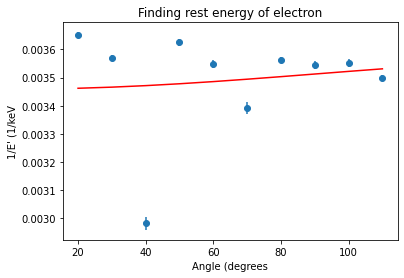

In [60]:
# finding rest mass of the electron
# A = 1/E
# B = 1/mc^2 for electron
def comptonfit(theta, A, B):
  return A + B*(1-np.cos(np.deg2rad(theta)))

#make  array of E' from energy calibrations

Eprimes = np.zeros(10)

Eprimes[0]=param_al20[4]*1.375+67.5
Eprimes[1]=param_al30[4]*1.375+67.5
Eprimes[2]=param_al40[4]*1.375+67.5
Eprimes[3]=param_al50[4]*1.375+67.5
Eprimes[4]=param_al60[4]*1.375+67.5
Eprimes[5]=param_al70[4]*1.375+67.5
Eprimes[6]=param_al80[4]*1.375+67.5
Eprimes[7]=param_al90[4]*1.375+67.5
Eprimes[8]=param_al100[4]*1.375+67.5
Eprimes[9]=param_al110[4]*1.375+67.5

error_eprimes = np.zeros(10)

error_eprimes[0] = pcov_al20[4][4]**0.5
error_eprimes[1] = pcov_al30[4][4]**0.5
error_eprimes[2] = pcov_al40[4][4]**0.5
error_eprimes[3] = pcov_al50[4][4]**0.5
error_eprimes[4] = pcov_al60[4][4]**0.5
error_eprimes[5] = pcov_al70[4][4]**0.5
error_eprimes[6] = pcov_al80[4][4]**0.5
error_eprimes[7] = pcov_al90[4][4]**0.5
error_eprimes[8] = pcov_al100[4][4]**0.5
error_eprimes[9] = pcov_al110[4][4]**0.5

error_relative = error_eprimes/Eprimes
print(error_relative)


Eprimes = 1/Eprimes
error_eprimes = Eprimes * error_relative

theta_vals = np.linspace(20,110,10)

guess_e = np.array([1.0,1.0])
param_e, pcov_e = curve_fit(comptonfit, theta_vals, Eprimes, p0=guess_e)

plt.plot(theta_vals, comptonfit(theta_vals, *param_e),color='red',label='fit')
plt.errorbar(theta_vals, Eprimes, yerr=error_eprimes, fmt='o')
plt.title('Finding rest energy of electron')
plt.ylabel("1/E' (1/keV")
plt.xlabel('Angle (degrees')
plt.savefig('real rest electron')

print(param_e, pcov_e)


[-2.40147467e+02  3.35767571e-01 -1.10851691e-04  2.91518677e+02
  1.51438117e+02  1.46633480e+01  6.47428023e+02  4.11042494e+02
  3.37659217e+02  2.11570731e+03  1.03846956e+03  4.60238902e+01]
2115.707307204556


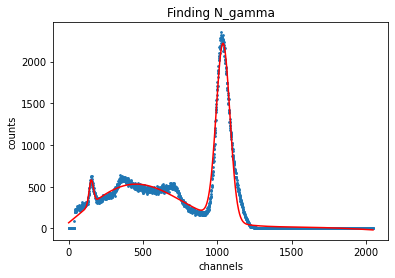

In [10]:
#finding Ngamma

def fit_without(x,a,b,c,amp1,mu1,sigma1,amp2,mu2,sigma2,amp3,mu3,sigma3):
  return background(x,a,b,c) + gauss(x,amp1,mu1,sigma1) + gauss(x,amp2,mu2,sigma2) + gauss(x,amp3,mu3,sigma3)

guesses_without = [1.0,1.0,1.0,700.0,100.0, 1.0,700.0,400.0,1.0,2500.0,1000.0,10.0]
param_without, pcov_without = curve_fit(fit_without, x_values, no_scatter, p0=guesses_without)


plt.plot(x_values, fit_without(x_values, *param_without), color='red')
plt.title('Finding N_gamma')
plt.xlabel('channels')
plt.ylabel('counts')
plt.scatter(x_values, no_scatter, s=3, label='data')

E_gamma = param_without[10]*1.375+67.5 

print(param_without)

N_gamma = param_without[9]
print(N_gamma)

[273.82202403 280.23280208 335.31783785 275.88317488 281.74007913
 294.68954612 280.73772531 282.19583443 281.54306072 285.80681012]
[6.48772671e+28 6.48772671e+28 7.41454481e+28 6.48772671e+28
 6.48772671e+28 6.48772671e+28 6.48772671e+28 6.48772671e+28
 6.48772671e+28 6.48772671e+28]
[ 1.73022573e-27  6.84917803e-28 -5.79613849e-28  3.01207461e-28
  2.74152752e-28  2.17144637e-28  2.60236167e-28  2.24751323e-28
  2.15873928e-28  3.00769509e-28]


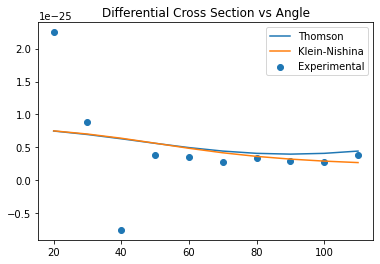

In [21]:
from math import e
#finding epsilon d omega
#then fitting thomson equation
#then fitting klein-nishina
#first what energy and I looking for?

r0 = (2.82*10**-13.0) # in centimeters
gamma = E_gamma / 511.0 # keV

# def inversefit(x,a,b):
#   return a+(b/x**2)
# #  return a*x**2.0 +b*x + c

def thomson(theta):
  return r0**2.0 * (1+(np.cos(np.deg2rad(theta))**2.0))/2.0

def klein_nishina(theta):
  a = r0**2.0 * (1+(np.cos(np.deg2rad(theta))**2.0))/2.0
  b = 1 / (1 + gamma*(1-np.cos(np.deg2rad(theta)))**2.0)
  c = gamma**2.0 * (1 - np.cos(np.deg2rad(theta)))**2.0
  d = 1 + np.cos(np.deg2rad(theta))**2.0
  e = 1 + gamma * (1 - np.cos(np.deg2rad(theta)))
  return a * b * (1 + c / (d*e))

print(1/Eprimes)
x_axis = np.array([1.0,5.0,10.0,20.0])
y20 = np.array([0.38,0.08,0.03,0.008]) #273 kev
guess_y20=[0.5,0.0]
paramy20, pcovy20 = curve_fit(inversefit, x_axis, y20, p0=guess_y20)


t = np.linspace(x_axis[0], x_axis[-1],1000)
# plt.plot(t, inversefit(t, *paramy20))
# plt.xscale('log')
# plt.scatter(x_axis, y20)
# plt.show()


#plt.plot(x_axis, y20)
#plt.show()


#It seems like that, whatever the value would be at 30 cm would be 
# very close to what the value is at 20 cm. The difference between 10
# and 20 cm on the scale is already so small in absolute terms....

#LET's just see if this gives us the shape we are looking for, by plotting
# as if the distance between crystal and scatterer were 20 cm

edo_test = np.array([0.07,0.07,0.08,0.07,0.07,0.07,0.07,0.07,0.07,0.07])
diff_denominator = n_e * N_gamma * edo_test
print(diff_denominator)

diff_cross_section_test = y_theta / diff_denominator
print(diff_cross_section_test)

diff_cross_section_error = error_y_theta / (n_e*N_gamma*edo_test)

plt.scatter(theta_vals, 130*diff_cross_section_test, label='Experimental')
plt.plot(theta_vals,thomson(theta_vals), label='Thomson')
plt.plot(theta_vals, klein_nishina(theta_vals), label='Klein-Nishina')
plt.legend()
plt.title('Differential Cross Section vs Angle')
plt.show()




#arraze = [5.0,5.0,5.0,5.0,5.0]

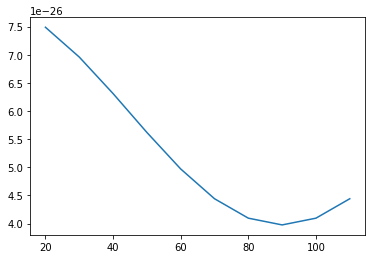

In [12]:
plt.plot(theta_vals, thomson(theta_vals))

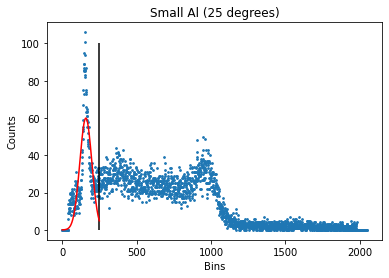

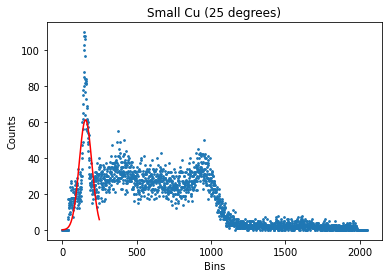

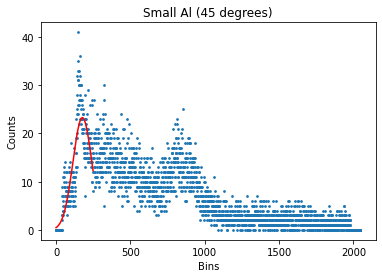

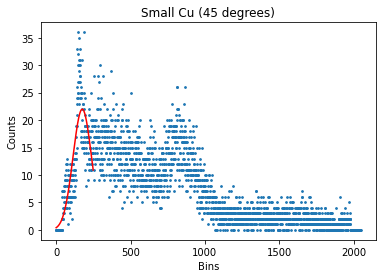

285.3954288754305
282.4264574923054
311.1904511595035
308.77778660419017
8.18717266762891e+25
2.8632730356514776e+26
3.845863311399738e-27 1.1229377458650063e-27 1.4939377666790468e-27 4.0338556379711963e-28


In [53]:
#Comparing cross sections of small Al and Cu scatterers at 25 and 45 degrees

small_al_25 = np.loadtxt('small_Al_25.Spe',skiprows=12,max_rows=2048)
small_cu_25 = np.loadtxt('small_Cu_25.Spe',skiprows=12,max_rows=2048)
small_al_45 = np.loadtxt('small_Al_45.Spe',skiprows=12,max_rows=2048)
small_cu_45 = np.loadtxt('small_Cu_45.Spe',skiprows=12,max_rows=2048)


guess_al25 = [110.0, 200.0, 5.0]
guess_cu25 = [110.0, 200.0, 5.0]
guess_al45 = [100.0, 200.0, 5.0]
guess_cu45 = [100.0, 200.0, 5.0]

param_al25, pcov_al25 = curve_fit(gauss, x_values[0:250], small_al_25[0:250], p0=guess_al25)
param_cu25, pcov_cu25 = curve_fit(gauss, x_values[0:250], small_cu_25[0:250], p0=guess_cu25)
param_al45, pcov_al45 = curve_fit(gauss, x_values[0:250], small_al_45[0:250], p0=guess_al45)
param_cu45, pcov_cu45 = curve_fit(gauss, x_values[0:250], small_cu_45[0:250], p0=guess_cu45)

y_al25 = param_al25[0] 
y_cu25 = param_cu25[0]
y_al45 = param_al45[0]
y_cu45 = param_cu45[0]

y_al25_error = pcov_al25[0][0]**0.5
y_cu25_error = pcov_cu25[0][0]**0.5
y_al45_error = pcov_al45[0][0]**0.5
y_cu45_error = pcov_cu45[0][0]**0.5



plt.scatter(x_values, small_al_25, s=3)
plt.plot(x_values[0:250], gauss(x_values[0:250], *param_al25), color='red')
plt.title('Small Al (25 degrees)')
plt.ylabel('Counts')
plt.xlabel('Bins')
#plt.savefig('small al25')
plt.vlines([250],0,100)
plt.show()

plt.scatter(x_values,small_cu_25, s=3)
plt.plot(x_values[0:250], gauss(x_values[0:250], *param_cu25), color='red')
plt.title('Small Cu (25 degrees)')
plt.ylabel('Counts')
plt.xlabel('Bins')
#plt.savefig('small cu25')
plt.show()

plt.scatter(x_values, small_al_45, s=3)
plt.plot(x_values[0:250], gauss(x_values[0:250], *param_al45), color='red')
plt.title('Small Al (45 degrees)')
plt.ylabel('Counts')
plt.xlabel('Bins')
#plt.savefig('small al45')
plt.show()

plt.scatter(x_values, small_cu_45, s=3)
plt.plot(x_values[0:250], gauss(x_values[0:250], *param_cu45), color='red')
plt.title('Small Cu (45 degrees)')
plt.ylabel('Counts')
plt.xlabel('Bins')
plt.savefig('small cu45')
plt.show()

print(param_al25[1]*1.375+67.5)
print(param_cu25[1]*1.375+67.5)
print(param_al45[1]*1.375+67.5)
print(param_cu45[1]*1.375+67.5)

ne_al = number_electrons(3.0,14.8,2.7,27.0,13.0)
print(ne_al)
ne_cu = number_electrons(3.1,15.4,8.96,63.5,29.0)
print(ne_cu)

diff_cross_al25 = y_al25 / (ne_al*N_gamma*0.09)
diff_cross_cu25 = y_cu25 / (ne_cu*N_gamma*0.09)
diff_cross_al45 = y_al45 / (ne_al*N_gamma*0.09)
diff_cross_cu45 = y_cu45 / (ne_cu*N_gamma*0.09)

print(diff_cross_al25, diff_cross_cu25, diff_cross_al45, diff_cross_cu45)

#adding up full energy areas of photopeaks

# small_al_25_sum = np.sum(small_al_25)
# print(small_al_25_sum)
# small_cu_25_sum = np.sum(small_cu_25)
# print(small_cu_25_sum)
# small_al_45_sum = np.sum(small_al_45)
# print(small_al_45_sum)
# small_cu_45_sum = np.sum(small_cu_45)
# print(small_cu_45_sum)

#Copper scatters more?

[0.00656337]
[0.00584585]
40707285.361714214
30501678.862560716


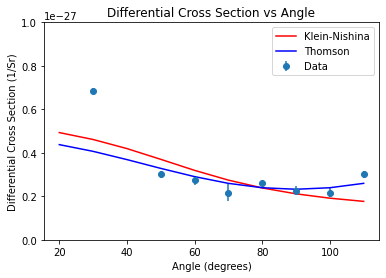

In [45]:
def kn_fit(theta, c1):
  a = r0**2.0 * (1+(np.cos(np.deg2rad(theta))**2.0))/2.0
  b = 1 / (1 + gamma*(1-np.cos(np.deg2rad(theta)))**2.0)
  c = gamma**2.0 * (1 - np.cos(np.deg2rad(theta)))**2.0
  d = 1 + np.cos(np.deg2rad(theta))**2.0
  e = 1 + gamma * (1 - np.cos(np.deg2rad(theta)))
  return c1 * (a * b * (1 + c / (d*e)))

def thomson_fit(theta, c1):
  return c1 * (r0**2.0 * (1+(np.cos(np.deg2rad(theta))**2.0))/2.0)


param_kn, pcov_kn = curve_fit(kn_fit, theta_vals[3:], diff_cross_section_test[3:], p0=130.0, sigma=diff_cross_section_error[3:])
print(param_kn)

param_thomson, pcov_thomson = curve_fit(thomson_fit, theta_vals[3:], diff_cross_section_test[3:], p0=100.0, sigma=diff_cross_section_error[3:])
print(param_thomson)


plt.plot(theta_vals, kn_fit(theta_vals,*param_kn), color='red', label='Klein-Nishina')
plt.errorbar(theta_vals, diff_cross_section_test, yerr = diff_cross_section_error, fmt='o', label='Data')
plt.title('Differential Cross Section vs Angle')
plt.ylabel('Differential Cross Section (1/Sr)')
plt.xlabel('Angle (degrees)')
#plt.plot(theta_vals, thomson(theta_vals)*param_kn[0])
plt.plot(theta_vals, thomson_fit(theta_vals, *param_thomson), color='blue', label='Thomson')
plt.legend()
plt.ylim(0,1e-27)
plt.savefig('Diff_cross_final')

chi_thomson = (thomson(theta_vals[3:]) - diff_cross_section_test[3:])**2 / diff_cross_section_error[3:]**2
print(np.sum(chi_thomson))
chi_klein_nishina = (klein_nishina(theta_vals[3:]) - diff_cross_section_test[3:])**2 / diff_cross_section_error[3:]**2
print(np.sum(chi_klein_nishina))

#klein nishina has the smaller chi square value